In [1]:
%matplotlib inline
import deepdish as dd
import h5py
import numpy as np
from galaxy_analysis.plot.plot_styles import *
import matplotlib.pyplot as plt


/home/aemerick/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/aemerick/code/galaxy_analysis/particle_analysis/IMF.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/sit

/home/aemerick/code/galaxy_analysis/particle_analysis/sn_rate.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", li

/home/aemerick/code/galaxy_analysis/plot/plot_styles.py:7: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/aemerick/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel/kernelapp.py", line 477, i

In [2]:
#run     = 'NSNS1'
#run     = 'HNE1'
#run     = 'AGB1'
run     = 'AGB1'

run2    = 'SNE1'

infile = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'

h5data    = h5py.File(infile,'r')
zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')
data_list = np.sort([x for x in h5data.keys() if 'DD' in x])


infile2 = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run2 + '/' + run2 + '_gas_abundances.h5'
h5data2    = h5py.File(infile2,'r')
data_list2 = np.sort([x for x in h5data2.keys() if 'DD' in x])


In [3]:
run_names = ['AGB1','NSNS1','SNE1','HNE1']


h5data_dict    = {}
data_list_dict = {}
infile_dict    = {}

for run in run_names:
    infile_dict[run] = '/home/aemerick/work/enzo_runs/mixing_experiment/' + run + '/' + run + '_gas_abundances.h5'
    h5data_dict[run] = h5py.File(infile_dict[run],'r')
    data_list_dict[run] = np.sort([x for x in h5data_dict[run].keys() if 'DD' in x])
    
abundances_to_average = {}
abundances_to_average['AGB1']  = ['C','N','O','Na','Mg','Si','S','Ca','Mn','Fe','Ni','As','Sr','Y','Ba','La','Ce','Pr','Nd']
abundances_to_average['NSNS1'] = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['SNE1']  = ['Na','Si','S','Ca','Mn','Ni','As']
abundances_to_average['HNE1']  = ['Na']

data_list = data_list_dict['AGB1']
infile = infile_dict['AGB1']
h5data = h5data_dict['AGB1']
zbins     = dd.io.load(infile,'/DD0500/CNM/mass_fraction/bins')


In [11]:
h5data['DD0672'].keys()

[u'CNM',
 u'Disk',
 u'HIM',
 u'Molecular',
 u'WIM',
 u'WNM',
 u'general',
 u'halo',
 u'star_forming']

In [4]:
def _old_get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                           SN_element = 'O', AGB_element = 'Ba', bins = zbins,
                           norm_stat = 'median'):
    
    result = {'AGB' : np.zeros(np.size(data_names)),
              'SN'  : np.zeros(np.size(data_names)),
              'time' : np.zeros(np.size(data_names))}
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        SN  = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + SN_element + '_Fraction')
        AGB = dd.io.load(fname, '/' + dname + '/CNM/mass_fraction/' + AGB_element + '_Fraction')
        
        # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
        if (norm_stat is None) or (norm_stat == ""):
            SN_norm  = np.zeros(np.size(log_z))
            AGB_norm = np.zeros(np.size(log_z))
        else:
            SN_norm   = np.log10(SN[norm_stat])
            AGB_norm  = np.log10(AGB[norm_stat])
        
        # find the 1 dex limit
        if (not (zdex is None)):
            result['SN'][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(SN['hist']))
            result['AGB'][i]= 1.0 - np.interp(zdex, log_z - AGB_norm, np.cumsum(AGB['hist']))
            
        else:
            result['SN'][i]  = np.interp(1.0-mf, np.cumsum( SN['hist']), log_z -  SN_norm)
            result['AGB'][i] = np.interp(1.0-mf, np.cumsum(AGB['hist']), log_z - AGB_norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result


def get_mass_fraction(zdex=None, mf = None, data_names = data_list, fname = infile,
                          bins = zbins, elements = None,
                          norm_stat = 'median', phase = 'CNM'):
    
    
    if elements is None:
        
        elements = dd.io.load(fname, '/metal_species')
        
    elif isinstance(elements, basestring):
        elements = [elements]
    
    result = {}
    for e in elements:
        result[e] = np.zeros(np.size(data_names))
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            if (norm_stat is None) or (norm_stat == ""):
                norm  = np.zeros(np.size(log_z))
            else:
                norm   = np.log10(mass_data[norm_stat])
        
            # find the 1 dex limit
            if (not (zdex is None)):
                result[e][i]= 1.0 - np.interp(zdex, log_z - SN_norm, np.cumsum(mass_data['hist']))
            
            else:
                result[e][i]  = np.interp(1.0-mf, np.cumsum( mass_data['hist']), log_z -  norm)
            
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)
        
    result['time'] = result['time'] - result['time'][0]
    
    return result




def get_stat(statname, data_names = data_list, fname = infile,
             bins = zbins, elements = None, logval = False, average_all= False, average_type = None, phase = 'CNM'):
    
    
    if elements is None:
        
        elements = dd.io.load(fname, '/metal_species')
        
    elif isinstance(elements, basestring):
        elements = [elements]
    
    result = {}
    for e in elements:
        result[e] = np.zeros(np.size(data_names))
        
    result['time'] = np.zeros(np.size(data_names))
    
    log_z  = np.log10( 0.5 * (bins[1:] + bins[:-1]))
    
    for i,d in enumerate(data_names):
        #
        # load mass fraction
        # 
        dname = str(d)
        for e in elements:
            
            try:
                mass_data  = dd.io.load(fname, '/' + dname + '/' + phase + '/mass_fraction/' + e + '_Fraction')
            except:
                print "Failing for " + dname, e
                continue
        
            # np.interp(mf, np.cumsum(SN['hist']), log_z - SN['median'])
        
            # find the 1 dex limit
            
            result[e][i] = mass_data[statname]
        

        
        result['time'][i] = dd.io.load(fname, '/'+dname+'/general/Time')
        
        # slightly better will be to just track the time evolution of 0.10 and 0.9
        # mass fractions (how far from mediam)

    if logval:
        for e in elements:
            result[e] = np.log10(result[e])
    result['time'] = result['time'] - result['time'][0]
    
    if average_all:
        
        result['average'] = np.zeros(np.size(result['time']))
        count = 0
        for k in result.keys():
            
            if average_type is None:
                if k == 'time' or k =='average' or np.isnan(result[k][0]):
                    continue
            else:
                if not (k in abundances_to_average[average_type]):
                    continue
                
            result['average'] = result['average'] + result[k]
            count = count + 1
            
        result['average'] = result['average']/(1.0 * count)
        
    
    return result

def list_stats(data_name, fname = infile):
    
    if not (isinstance(data_name,basestring)):
        if isinstance(data_name[0],basestring):
            dname = data_name[0]
        else:
            raise ValueError
    else:
        dname = data_name
        
    return (dd.io.load(fname, '/' + str(dname) +'/CNM/mass_fraction/O_Fraction')).keys()    
    

In [51]:
SN  = dd.io.load('gas_abundances.h5', '/DD0500/CNM/mass_fraction/O_Fraction')

zval = np.log10(0.5*(zbins[1:]+zbins[:-1])) - np.log10(SN['median'])
xval = np.cumsum(SN['hist'])

print np.interp(1.0, zval, xval)

d = 'DD0640'

dd.io.load('gas_abundances.h5', '/'+d+'/general/Time')


0.994872561855


639.9999938633

In [55]:
result = old_get_mass_fraction(zdex=1.0)
result2 = old_get_mass_fraction(zdex=0.5)
result3 = old_get_mass_fraction(zdex=0.25)

[]

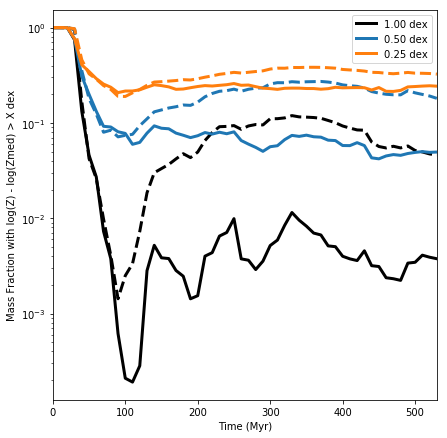

In [57]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '1.00 dex')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '0.50 dex')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '0.25 dex')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('Mass Fraction with log(Z) - log(Zmed) > X dex')
ax.semilogy()

In [79]:
result  = get_mass_fraction(mf=0.1)
result2 = get_mass_fraction(mf=0.9)
result3  = get_mass_fraction(mf=0.25)
result4 = get_mass_fraction(mf=0.75)
result5  = get_mass_fraction(mf=0.01)
result6 = get_mass_fraction(mf=0.99)

(-1, 1)

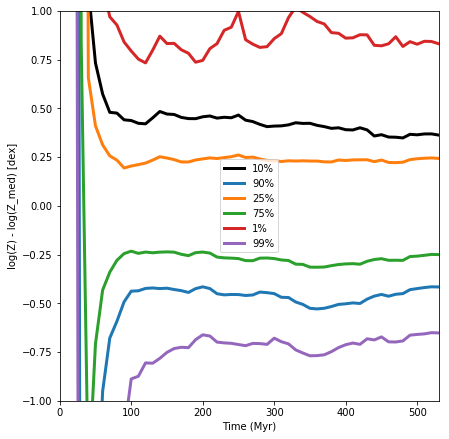

In [80]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
#ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
#ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

ax.plot(result5['time'], result5['SN'], lw = 3, color = 'C3', label = '1%')
ax.plot(result6['time'], result6['SN'], lw = 3, color = 'C4', label = '99%')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)

(-1, 1)

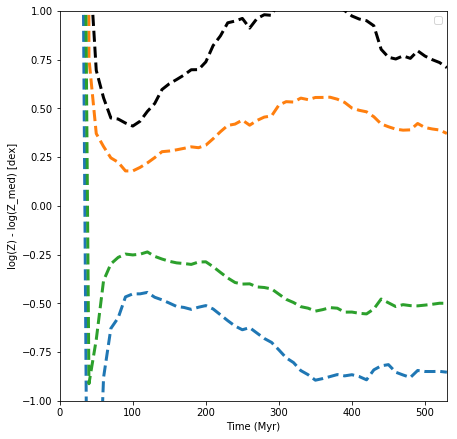

In [77]:
fig, ax = plt.subplots()

fig.set_size_inches(6,6)

#ax.plot(result['time'], result['SN'], lw = 3, color = 'black', label = '10%')
ax.plot(result['time'], result['AGB'], lw = 3, color = 'black', ls = '--')

#ax.plot(result2['time'], result2['SN'], lw = 3, color = 'C0', label = '90%')
ax.plot(result2['time'], result2['AGB'], lw = 3, color = 'C0', ls = '--')

#ax.plot(result3['time'], result3['SN'], lw = 3, color = 'C1', label = '25%')
ax.plot(result3['time'], result3['AGB'], lw = 3, color = 'C1', ls = '--')

#ax.plot(result4['time'], result4['SN'], lw = 3, color = 'C2', label = '75%')
ax.plot(result4['time'], result4['AGB'], lw = 3, color = 'C2', ls = '--')
ax.legend(loc='best')


plt.tight_layout()

ax.set_xlim(result['time'][0], result['time'][-1])
ax.set_xlabel('Time (Myr)')
ax.set_ylabel('log(Z) - log(Z_med) [dex]')
ax.set_ylim(-1,1)

In [18]:
list_stats(data_list)

['Q1',
 'std',
 'Q3',
 'decile_9',
 'min',
 'max',
 'decile_1',
 'hist',
 'median',
 'inner_quartile_range',
 'd9_d1_range',
 'mode',
 'variance',
 'mean']

In [70]:
median = get_stat('median', logval = True, average_all = True)


In [61]:
mean = get_stat('mean', logval = True, average_all = True)
Q1   = get_stat('Q1', logval = True, average_all = True)
Q3   = get_stat('Q3', logval = True, average_all = True)
d9   = get_stat('decile_9',logval=True,average_all=True)
d1   = get_stat('decile_1',logval=True,average_all=True)



In [6]:
def _get_plot_values(phase, run, stat, species = 'average'):
    
    
    
    if stat in all_data[phase][run].keys():
        y = all_data[phase][run][stat][species]
    elif stat == 'mean-median':
        y = all_data[phase][run]['mean'][species] - all_data[phase][run]['median'][species]
    elif stat == 'max-min':
        y = all_data[phase][run]['max'][species] - all_data[phase][run]['min'][species]
    elif stat == 'IQR':
        y = all_data[phase][run]['Q3'][species] - all_data[phase][run]['Q1'][species]
    elif stat == 'IDR':
        y = all_data[phase][run]['decile_9'][species] - all_data[phase][run]['decile_1'][species]
    else:
        raise ValueError
    
    time = all_data[phase][run]['mean']['time']
    
    return time, y

In [5]:
all_data = {}

phases = ['Disk','CNM','WNM','WIM','HIM','halo']

for phase in phases:
    all_data[phase] = {}
    
    print phase 
    
    for run in run_names:
        all_data[phase][run] = {}
        for stat in ['mean','median','Q1','Q3','decile_9','decile_1','min','max']:
            all_data[phase][run][stat] = get_stat(stat, logval = True, 
                                           average_all = True, average_type = run,
                                           data_names  = data_list_dict[run], 
                                           fname = infile_dict[run], phase = phase)

Disk
CNM
WNM
WIM
HIM
halo


In [5]:
        
event_data = {}
for run in run_names:
    event_data[run] = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' +\
                                    run + '_event_data_table.dat', names = True, dtype = None)      

/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  after removing the cwd from sys.path.


## NOTE: 

My analysis scripts define the ISM disk radius as r = 600 pc at the moment. This really screws with the enrichment events that occur at r = 600 pc... need to be care ful in analysis (as of 3/29)

In [44]:
event_data = {}
for run in run_names + ['AGB1_400','NSNS1_400','SNE1_400']:
    event_data[run] = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' +\
                                    run + '_event_data_table.dat', names = True, dtype=None)

/home/aemerick/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  This is separate from the ipykernel package so we can avoid doing imports until


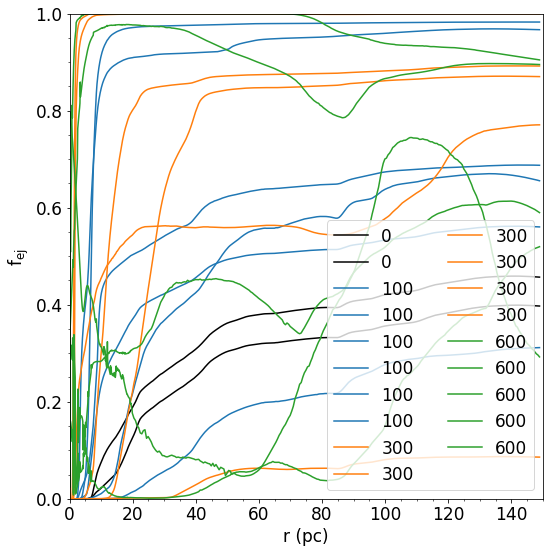

In [52]:
run = 'AGB1'

select  = (event_data[run]['z'] == 0.0) 
select  = (event_data[run]['z'] > -10000)
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


fig, ax = plt.subplots()
fig.set_size_inches(8,8)


radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


plot_time = 10.0
yvals     = np.zeros(np.size(r))
for i,t in enumerate(tracers):
    
    data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                         '/' + t + '_enrichment_evolution.dat', names = True)
    
    func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
    yvals[i] = func(plot_time,'CGM')
    
    ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
#ax.scatter( r, yvals, label = run + " %.0f"%(plot_time), s = 20)

ax.set_xlabel('r (pc)')
ax.set_ylabel(r'f$_{\rm ej}$')
ax.set_ylim(0,1.0)
ax.set_xlim(0.0, 150.0)
ax.legend(loc='best',ncol=2)

plt.minorticks_on()
plt.tight_layout()
    
    

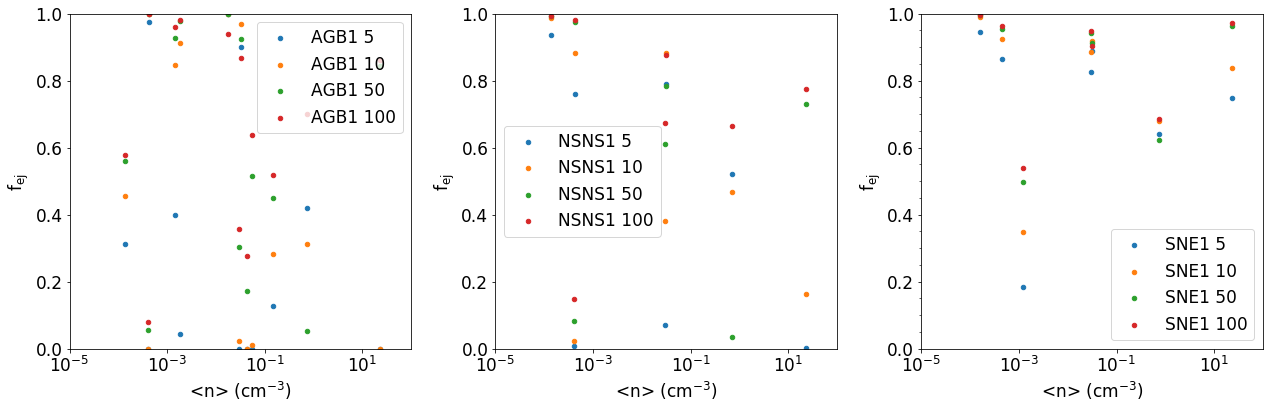

In [49]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}

for ax,run in zip(axes,['AGB1','NSNS1','SNE1']):
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    n       = event_data[run]['n_m'][select]
    
    for plot_time in [5,10.0, 50.0, 100.0]:

        yvals     = np.zeros(np.size(n))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        ax.scatter( n, yvals, label = run + " %.0f"%(plot_time), s = 20)

    ax.set_xlabel(r'<n> (cm$^{-3}$)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(1.0E-5,1.0E2)
    ax.semilogx()
    ax.legend(loc='best',ncol=1)

plt.minorticks_on()
plt.tight_layout()
    
    

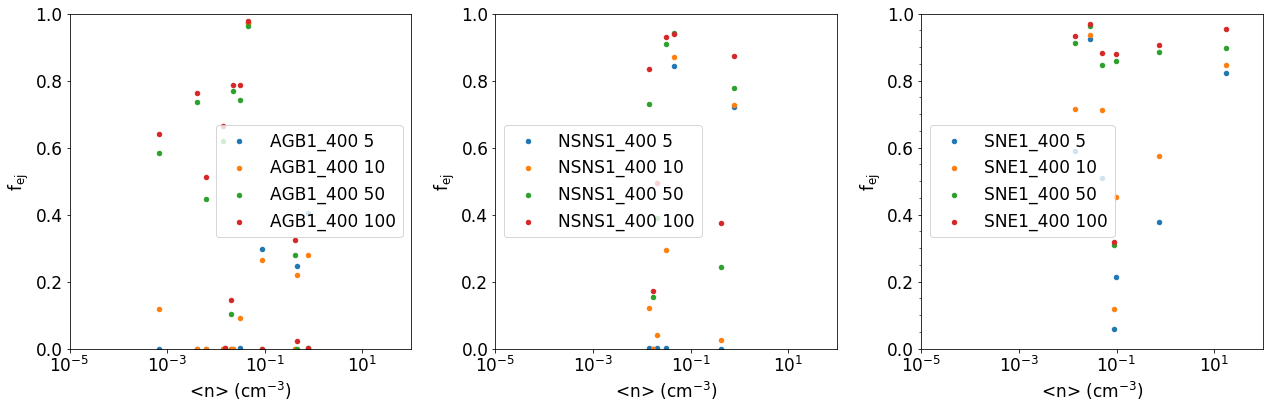

In [48]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}

for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    n       = event_data[run]['n_m'][select]
    
    for plot_time in [5,10.0, 50.0, 100.0]:

        yvals     = np.zeros(np.size(n))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        ax.scatter( n, yvals, label = run + " %.0f"%(plot_time), s = 20)

    ax.set_xlabel(r'<n> (cm$^{-3}$)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(1.0E-5,1.0E2)
    ax.semilogx()
    ax.legend(loc='best',ncol=1)

plt.minorticks_on()
plt.tight_layout()
    
    

0.0
0.05059366903395703
0.04016156281918237
0.3110141253342241
0.0
0.10884836430328203
0.2958020727552209
0.42058965173519564
0.0
0.11860009219504243
0.0716579
0.0
0.27736767514268096
0.033004560000000016
0.0
0.22025333452325932
0.04457283797324052
0.0
0.24721483719284704
0.006987989999999944


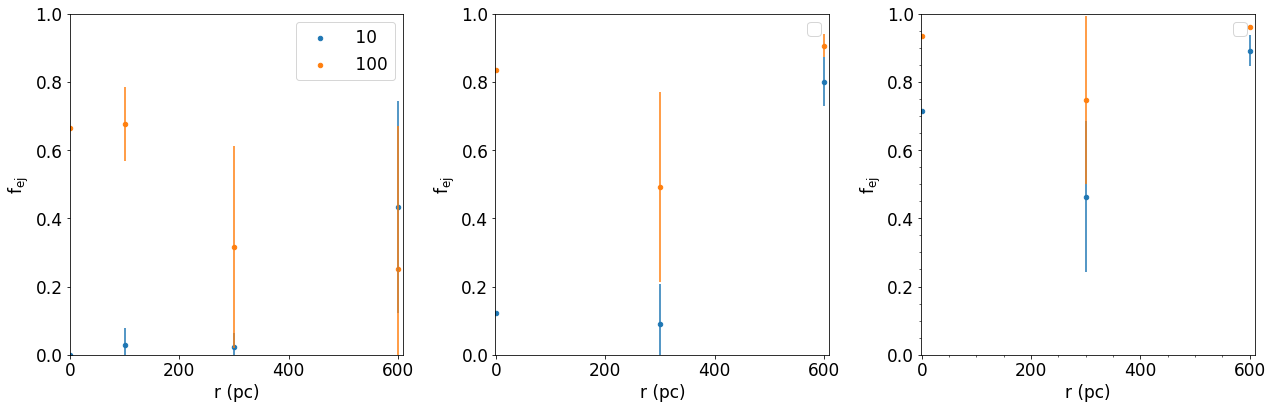

In [67]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
k = 0
for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    r       = event_data[run]['r_cyl'][select]
    
    for j,plot_time in enumerate([ 10.0,100]):

        yvals     = np.zeros(np.size(r))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        l = 0
        for rval in np.unique(r):
            x = rval
            y = np.average( yvals[ r == rval])
            std = np.std(yvals[r == rval])
            print std
            if k == 0 and l == 0:
                ax.scatter( x, y, label = " %.0f"%(plot_time), s = 20, color = "C%i"%(j))
            else:
                ax.scatter( x, y, s = 20, color = "C%i"%(j))
            ax.errorbar( x, y, std, color = 'C%i'%(j))

            l = l + 1
    ax.set_xlabel(r'r (pc)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(-1, 610.0)
    
    ax.legend(loc='best',ncol=1)
    k = k + 1

plt.minorticks_on()
plt.tight_layout()
    
    

0.0
0.00014940885157547327
0.13884915018649324
0.3683840781299368
0.0
0.0631262491371913
0.2030276357570415
0.17493347675019574
0.0
0.03728071656259226
0.25995879022811763
0.0
0.14336418029830017
0.042379390625765956
0.0
0.011589069731057491
0.08174142568064346
0.0
0.08477262130634529
0.17599592685701304


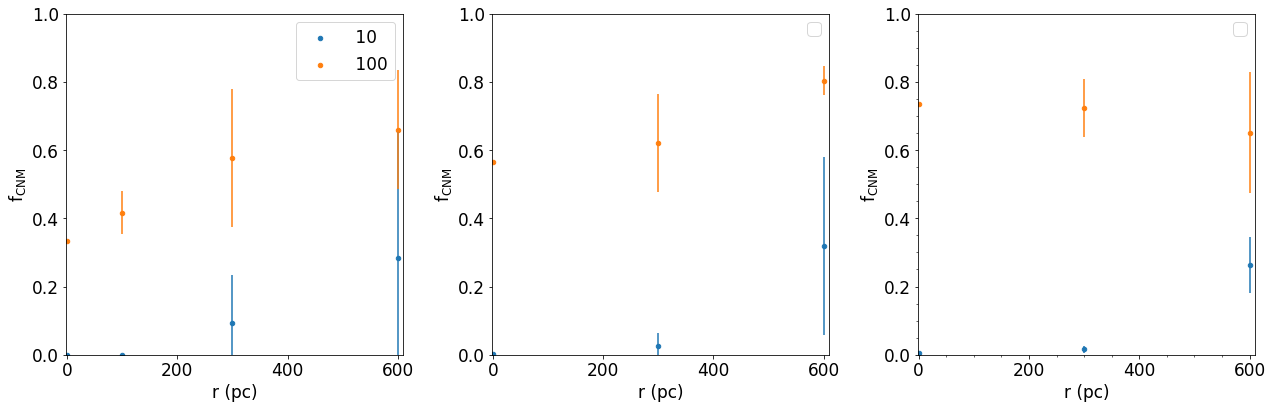

In [69]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, axes = plt.subplots(1,3)
fig.set_size_inches(18,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}
k = 0
for ax,run in zip(axes,['AGB1_400','NSNS1_400','SNE1_400']):
    
    select = event_data[run]['z'] == 0.0

    tracers = event_data[run]['Element'][select]
    r       = event_data[run]['r_cyl'][select]
    
    for j,plot_time in enumerate([ 10.0,100]):

        yvals     = np.zeros(np.size(r))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CNM') / func(plot_time,'Disk')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        l = 0
        for rval in np.unique(r):
            x = rval
            y = np.average( yvals[ r == rval])
            std = np.std(yvals[r == rval])
            print std
            if k == 0 and l == 0:
                ax.scatter( x, y, label = " %.0f"%(plot_time), s = 20, color = "C%i"%(j))
            else:
                ax.scatter( x, y, s = 20, color = "C%i"%(j))
            ax.errorbar( x, y, std, color = 'C%i'%(j))

            l = l + 1
    ax.set_xlabel(r'r (pc)')
    ax.set_ylabel(r'f$_{\rm CNM}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(-1, 610.0)
    
    ax.legend(loc='best',ncol=1)
    k = k + 1

plt.minorticks_on()
plt.tight_layout()
    
    

[-5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897
 -5.69897 -5.69897 -5.69897 -5.69897 -5.69897]
[-2. -2. -2. -2. -2. -2. -2.]
[0. 0. 0. 0. 0. 0. 0.]


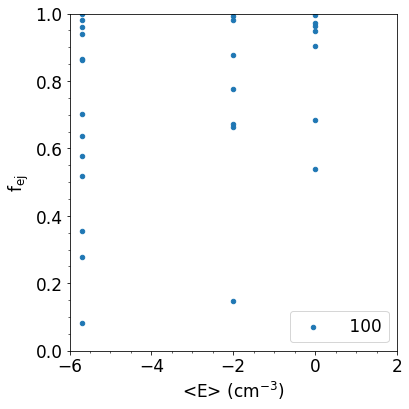

In [53]:
run = 'AGB1'

#select  = (event_data[run]['z'] == 0.0) 


fig, ax = plt.subplots()
fig.set_size_inches(6,6)


#radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}

for k,run in enumerate(['AGB1','NSNS1','SNE1']):

    select = event_data[run]['z'] == 0.0
    
    tracers = event_data[run]['Element'][select]
    E       = np.log10(event_data[run]['E51'][select])
    print E
    for j,plot_time in enumerate([100.0]):

        yvals     = np.zeros(np.size(E))
        for i,t in enumerate(tracers):
    
            data = np.genfromtxt('/home/aemerick/work/enzo_runs/mixing_experiment/' + run +\
                             '/' + t + '_enrichment_evolution.dat', names = True)
    
            func = lambda x, phase : np.interp(x, data['time'], data[phase])
    
            yvals[i] = func(plot_time,'CGM')
    
        #ax.plot(data['time'],data['CGM'], color = radial_colors["%0.0f"%(r[i])], label = "%.0f"%(r[i]))
    
        if k == 0:
            ax.scatter( E, yvals, label = " %.0f"%(plot_time), s = 20, color = "C%i"%(j))
        else:
            ax.scatter( E, yvals, s = 20, color = "C%i"%(j))

    ax.set_xlabel(r'<E> (cm$^{-3}$)')
    ax.set_ylabel(r'f$_{\rm ej}$')
    ax.set_ylim(0,1.0)
    ax.set_xlim(-6, 2)
    #ax.semilogx()
    ax.legend(loc='best',ncol=1)

plt.minorticks_on()
plt.tight_layout()
    
    

['C' 'Na' 'Mg' 'Fe' 'Ni' 'O' 'Si' 'Mn' 'As' 'N' 'S' 'Ca' 'Sr']


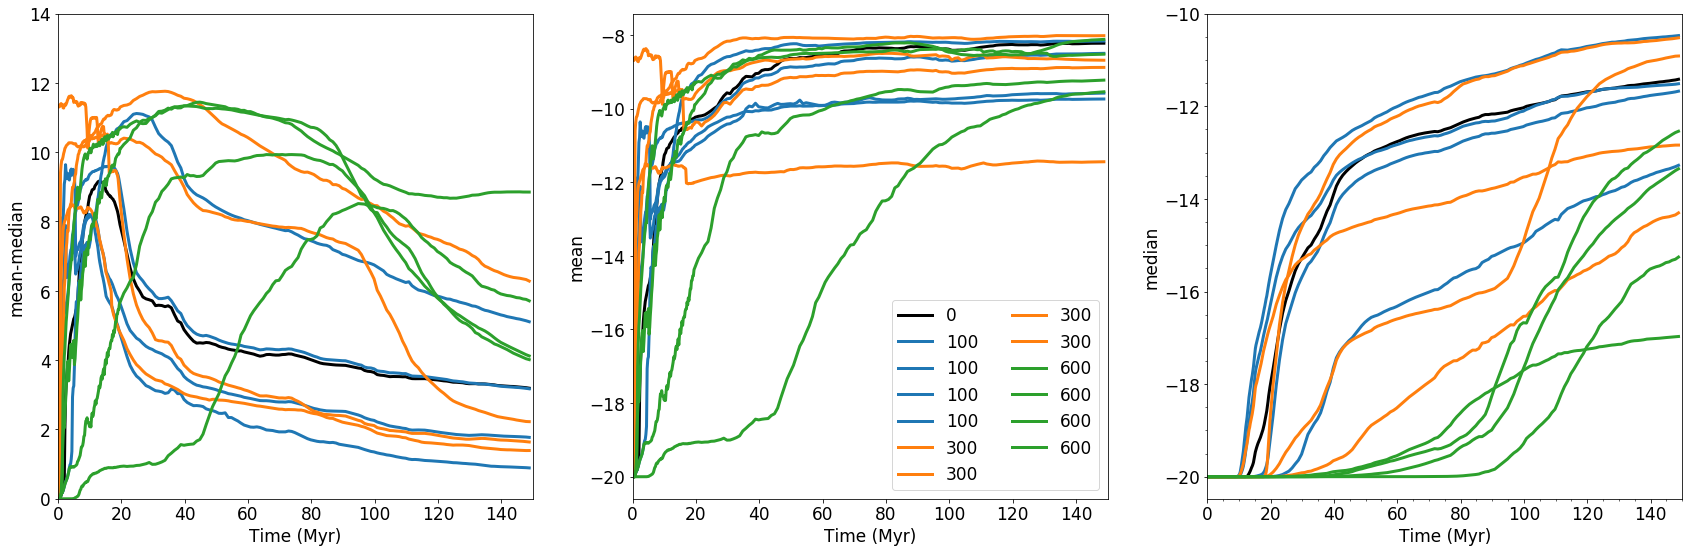

In [23]:
#
#
#
# Now I want to plot f_ej 
#
#

# gather which tracers are at the desired r or z 
#
# pick any r, only midplane though
#
run = 'AGB1'

select  = event_data[run]['z'] == 0.0
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


print tracers

# plot evolution?
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

radial_ls = ['-','-.','--',':']
radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


for i,e in enumerate(tracers):
    
    color = radial_colors["%.0f"%(r[i])]
    if r[i] > 0:
        ls    = radial_ls[i%4]
    else:
        ls = '-'
    #viridis( i / (1.0*np.size(tracers)))
    
    stat = 'mean-median'
    x,y = _get_plot_values('CNM', run, stat, e)
    ax[0].plot(x,y,lw = 3,label = "%.1f"%(r[i]),  color = color)
    ax[0].set_ylabel(stat)
    
    stat = 'mean'
    x,y = _get_plot_values('CNM', run, stat, e)       
    ax[1].plot(x,y,lw=3, color = color, label = "%.0f"%(r[i]))
    ax[1].set_ylabel(stat)

    stat = 'median'
    x,y = _get_plot_values('CNM', run, stat, e)        
    ax[2].plot(x,y,lw=3,color = color)
    ax[2].set_ylabel(stat)
    
for a in ax:
    a.set_xlabel('Time (Myr)')
    a.set_xlim(0,150.0)
ax[0].set_ylim(0,14)
#ax[1].set_ylim()

ax[1].legend(loc='best', ncol = 2)
#ax
plt.minorticks_on()
plt.tight_layout()

['C' 'Na' 'Mg' 'Fe' 'Ni' 'O' 'Si' 'Mn' 'As' 'N' 'S' 'Ca' 'Sr']


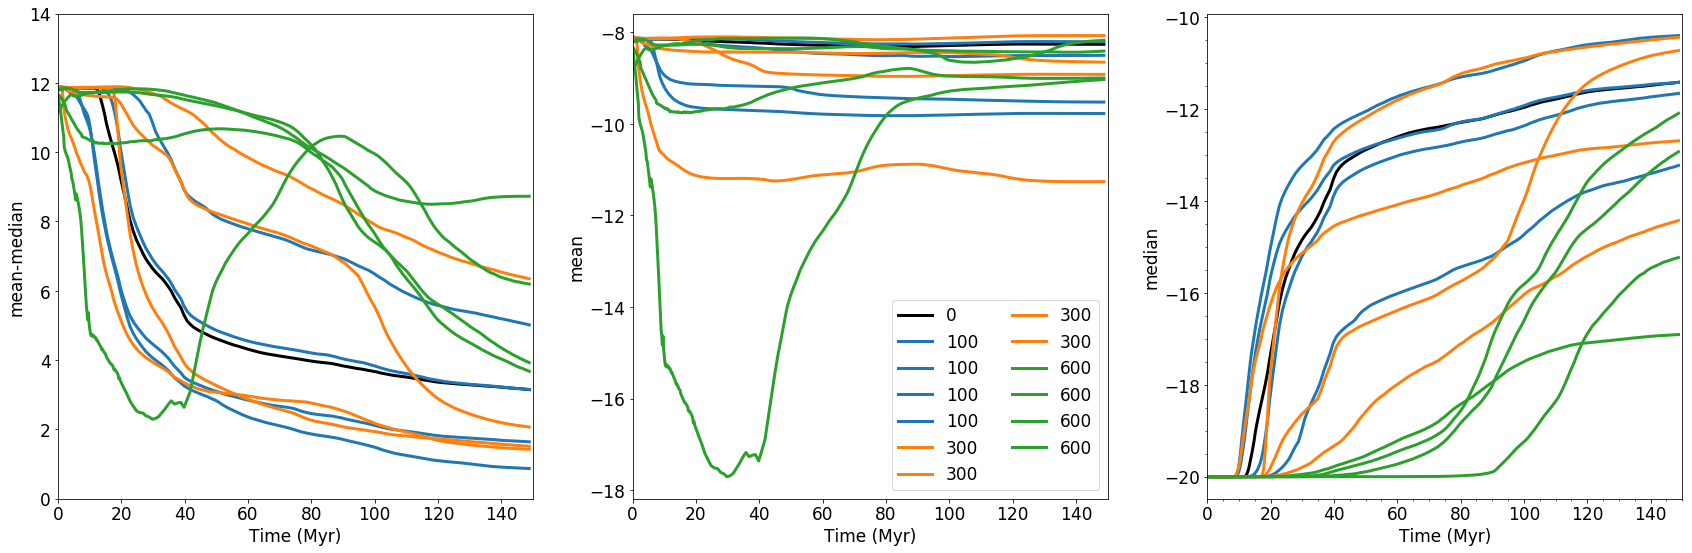

In [24]:
#
#
#
# Now I want to plot f_ej 
#
#

# gather which tracers are at the desired r or z 
#
# pick any r, only midplane though
#
run = 'AGB1'

select  = event_data[run]['z'] == 0.0
tracers = event_data[run]['Element'][select]
r       = event_data[run]['r_cyl'][select]

tracers = tracers[np.argsort(r)]
r       = r[np.argsort(r)]


print tracers

# plot evolution?
fig, ax = plt.subplots(1,3)
fig.set_size_inches(24,8)

radial_ls = ['-','-.','--',':']
radial_colors = {"0" : 'black', "100" : "C0", "300" : "C1" , "600" : "C2"}


for i,e in enumerate(tracers):
    
    color = radial_colors["%.0f"%(r[i])]
    if r[i] > 0:
        ls    = radial_ls[i%4]
    else:
        ls = '-'
    #viridis( i / (1.0*np.size(tracers)))
    
    stat = 'mean-median'
    phase = 'Disk'
    x,y = _get_plot_values(phase, run, stat, e)
    ax[0].plot(x,y,lw = 3,label = "%.1f"%(r[i]),  color = color)
    ax[0].set_ylabel(stat)
    
    stat = 'mean'
    x,y = _get_plot_values(phase, run, stat, e)       
    ax[1].plot(x,y,lw=3, color = color, label = "%.0f"%(r[i]))
    ax[1].set_ylabel(stat)

    stat = 'median'
    x,y = _get_plot_values(phase, run, stat, e)        
    ax[2].plot(x,y,lw=3,color = color)
    ax[2].set_ylabel(stat)
    
for a in ax:
    a.set_xlabel('Time (Myr)')
    a.set_xlim(0,150.0)
ax[0].set_ylim(0,14)
#ax[1].set_ylim()

ax[1].legend(loc='best', ncol = 2)
#ax
plt.minorticks_on()
plt.tight_layout()

In [ ]:
print all_data['CNM']['AGB1'].keys()

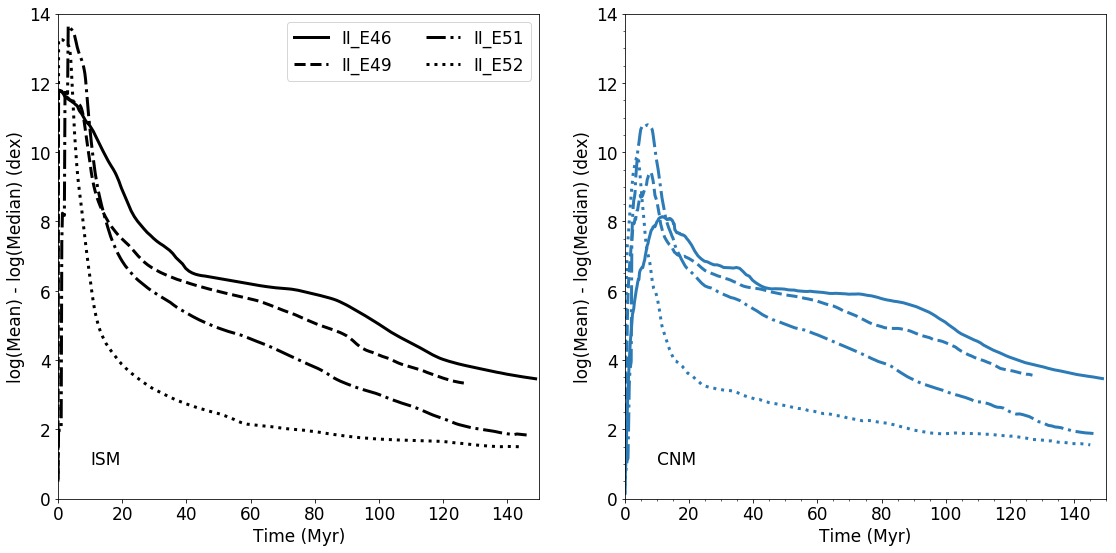

In [19]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
lines = {'AGB1' : '-', 'NSNS1' : '--', 'SNE1' : '-.' , 'HNE1' : ':'}
labels = {'AGB1' : 'II_E46', 'NSNS1' : 'II_E49' , 'SNE1' : 'II_E51', 'HNE1' : 'II_E52'}
for run in run_names:
    x,y = _get_plot_values('Disk', run, 'mean-median', 'average')
    ax[0].plot(x, y, color = 'black', lw = 3, ls = lines[run], label = labels[run])
    
for run in run_names:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax[1].plot(x, y, color = color_dict['CNM'], lw = 3, ls = lines[run], label = labels[run])

for a in ax:
    a.set_xlim(0,150.0)
    a.set_ylim(0,14)
    a.set_ylabel(r'log(Mean) - log(Median) (dex)')
    a.set_xlabel(r'Time (Myr)')

ax[0].legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
ax[1].annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("ISM_CNM_average_mean-median.png")

In [ ]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(16,8)
lines = {'AGB1_400' : '-', 'NSNS1_400' : '--', 'SNE1_400' : '-.' }
labels = {'AGB1_400' : 'III_E46', 'NSNS1_400' : 'III_E49' , 'SNE1' : 'III_E51'}
for run in run_names:
    x,y = _get_plot_values('Disk', run, 'mean-median', 'average')
    ax[0].plot(x, y, color = 'black', lw = 3, ls = lines[run], label = labels[run])
    
for run in run_names:
    x,y = _get_plot_values('CNM', run, 'mean-median', 'average')
    ax[1].plot(x, y, color = color_dict['CNM'], lw = 3, ls = lines[run], label = labels[run])

for a in ax:
    a.set_xlim(0,150.0)
    a.set_ylim(0,14)
    a.set_ylabel(r'log(Mean) - log(Median) (dex)')
    a.set_xlabel(r'Time (Myr)')

ax[0].legend(ncol=2)
plt.minorticks_on()
plt.tight_layout()

ax[0].annotate("ISM", xy = (10,1), xycoords = 'data')
ax[1].annotate("CNM", xy = (10,1), xycoords = 'data')


fig.savefig("ISM_CNM_400_average_mean-median.png")

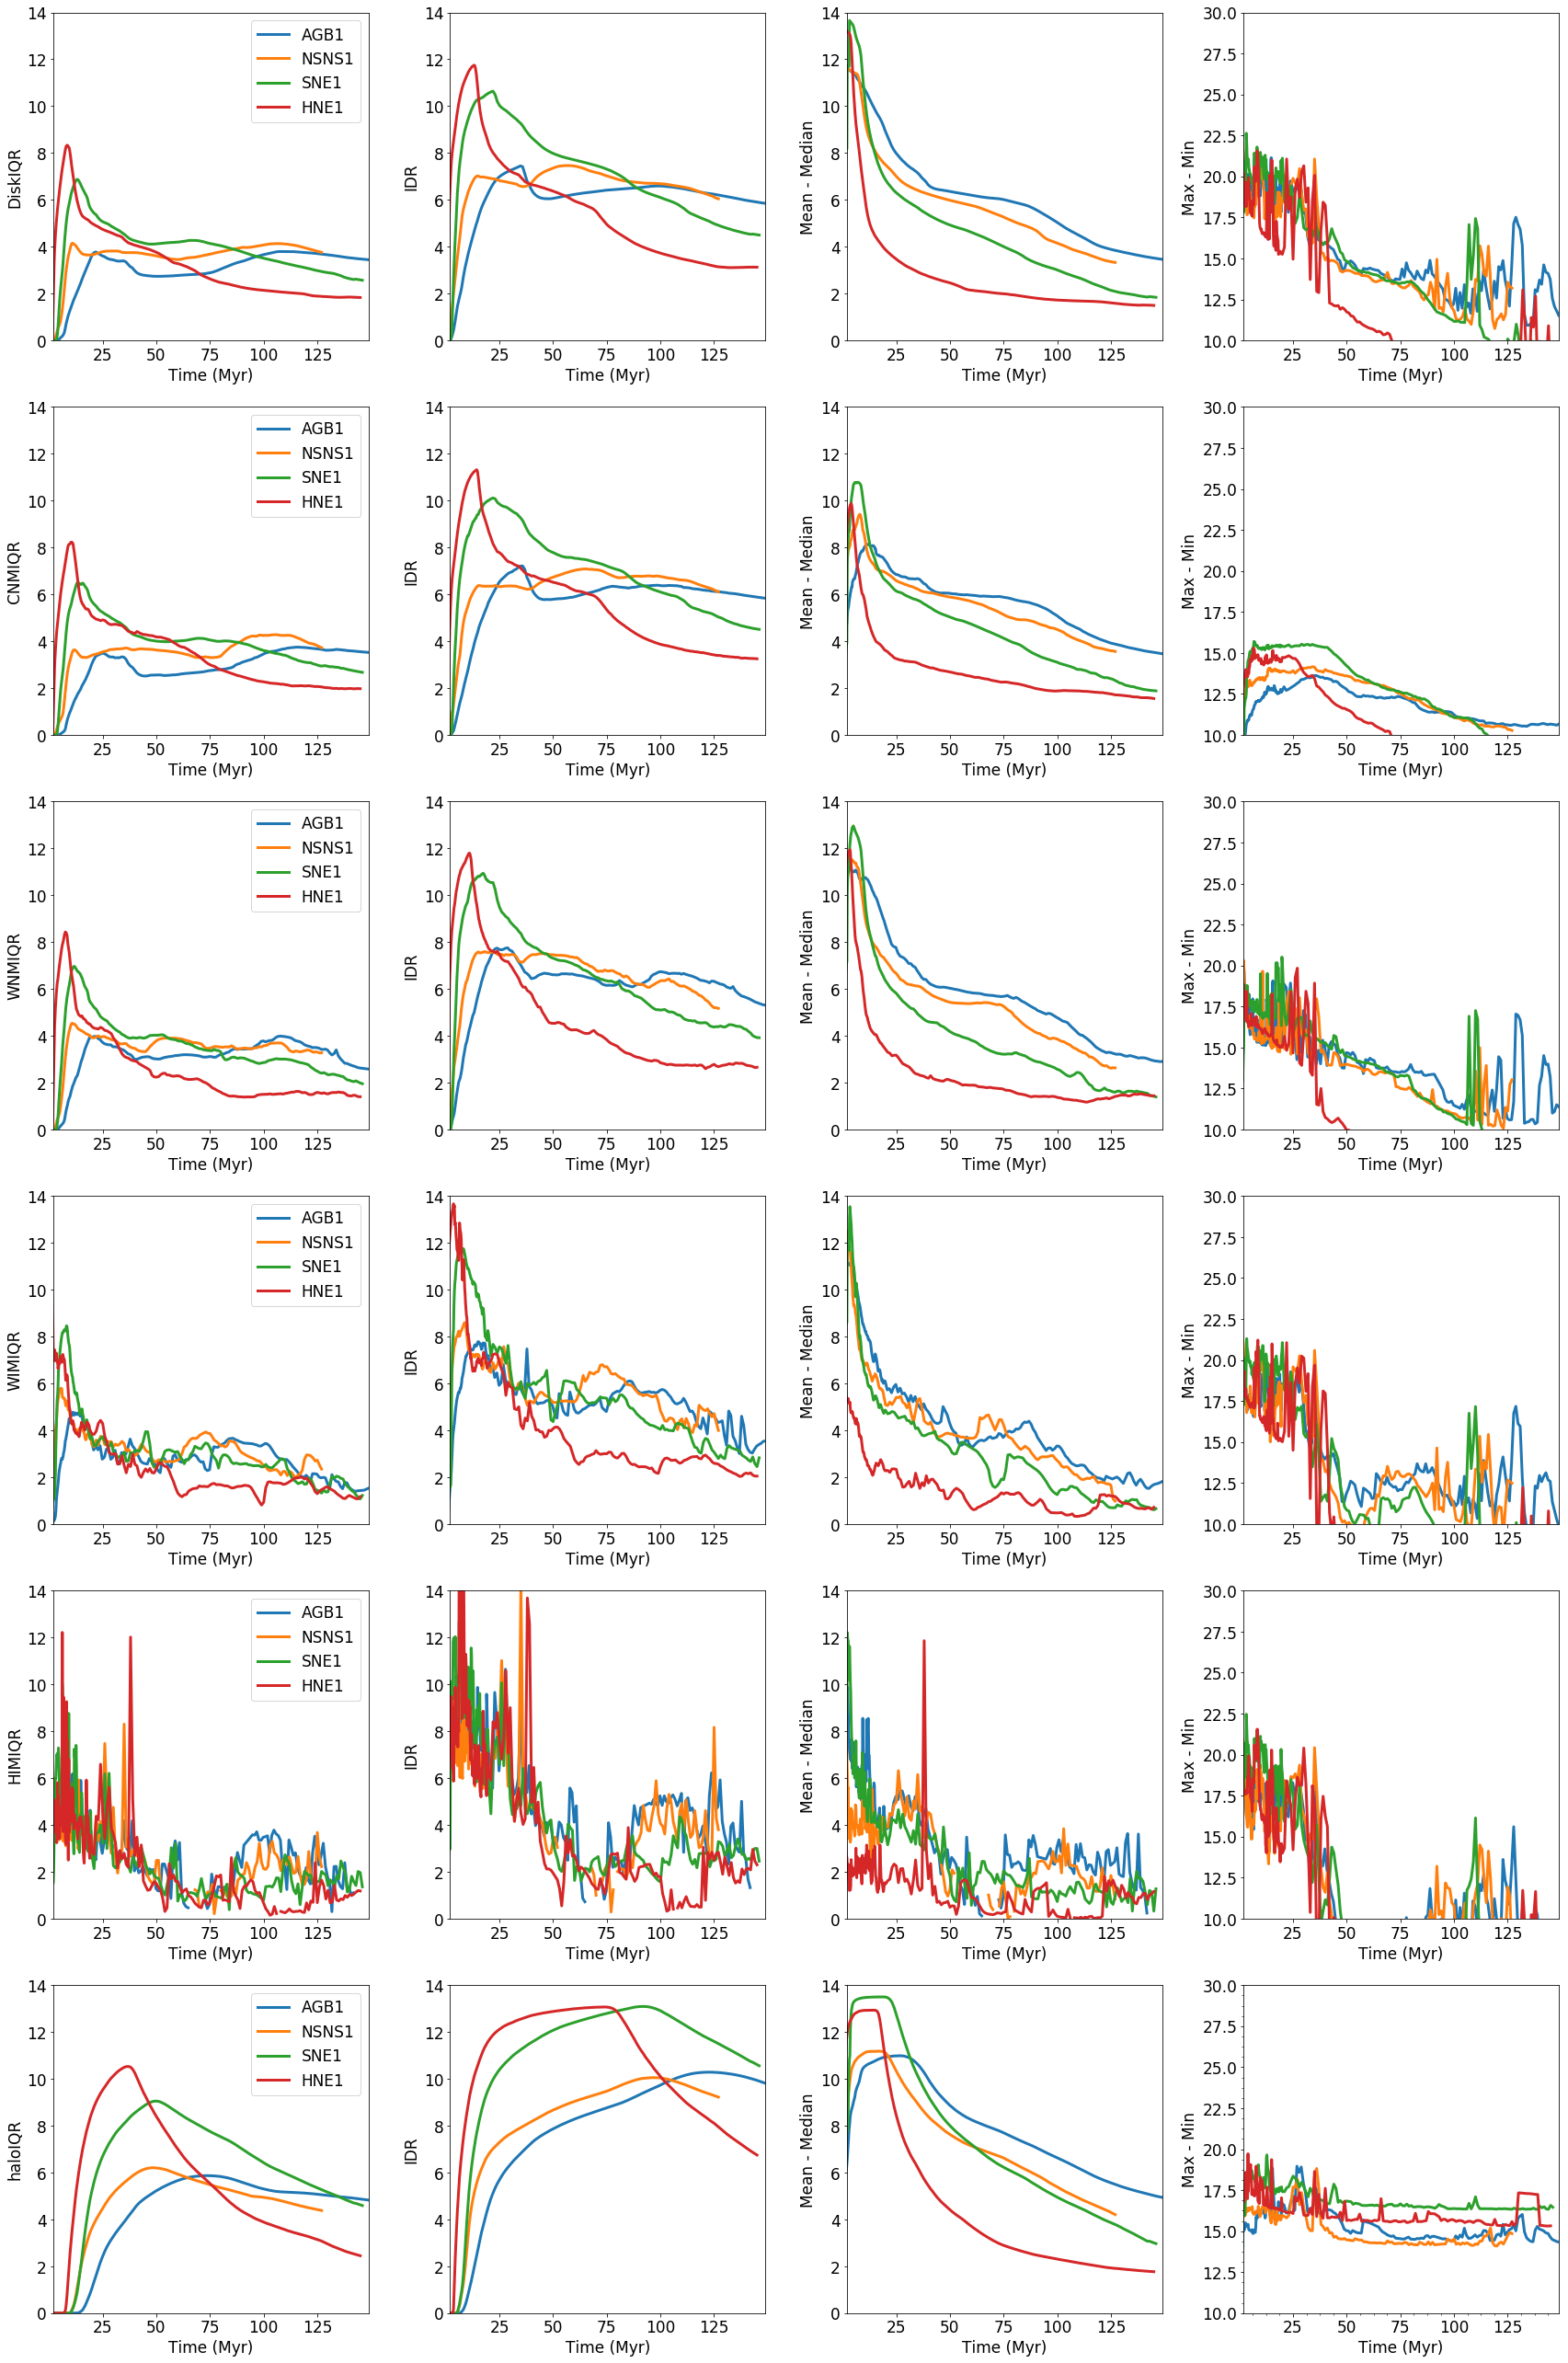

In [14]:
fig, all_ax = plt.subplots(6,4)
fig.set_size_inches(24,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#

colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'IQR', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'IDR', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    

    for run in run_names:
        x,y = _get_plot_values(phase, run, 'max-min', 'average')
        ax[3].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(2,maxx)

    ax[0].set_ylabel(phase + 'IQR')
    ax[1].set_ylabel('IDR')
    ax[2].set_ylabel('Mean - Median')
    ax[3].set_ylabel('Max - Min')
    
    ax[0].legend(loc= 'best')        
    
    ax[0].set_ylim(0,14)
    ax[1].set_ylim(0,14)
    ax[2].set_ylim(0,14)
    ax[3].set_ylim(10,30)
    
    
plt.minorticks_on()        
plt.tight_layout()






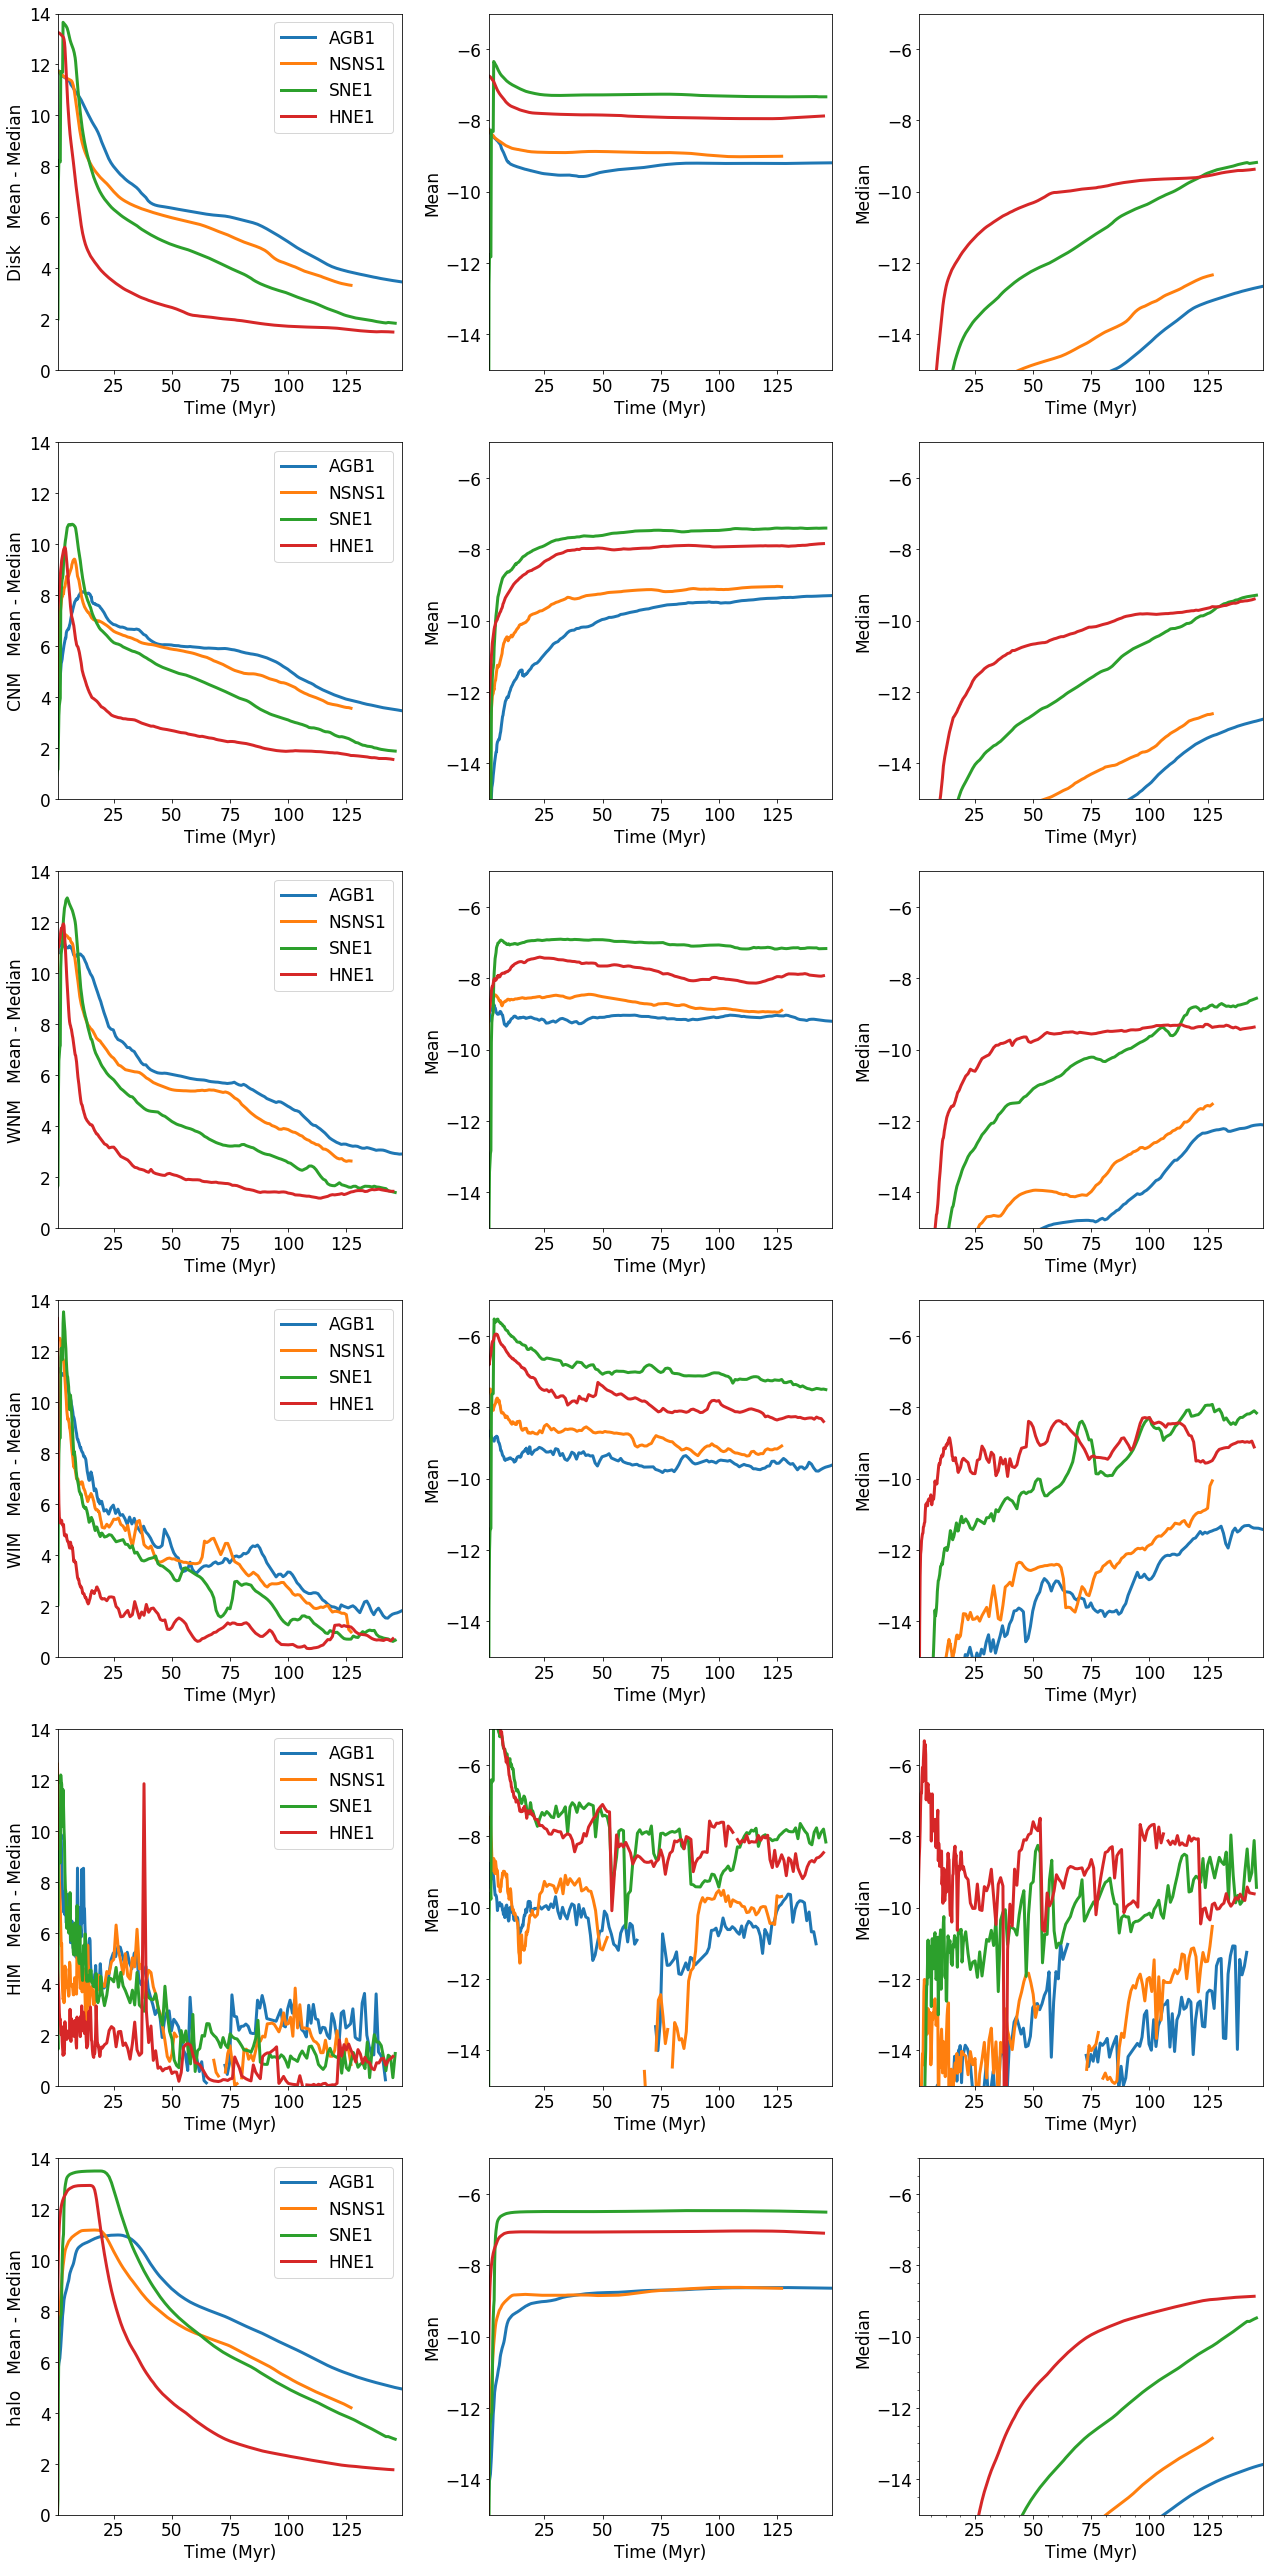

In [12]:
fig, all_ax = plt.subplots(6,3)
fig.set_size_inches(18,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#




colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(1,maxx)

    ax[0].set_ylabel(phase + '   Mean - Median')
    ax[1].set_ylabel('Mean')
    ax[2].set_ylabel('Median')
    ax[0].legend(loc= 'best')        
    
    ax[0].set_ylim(0,14)
    ax[1].set_ylim(-15,-5)
    ax[2].set_ylim(-15,-5)

plt.minorticks_on()        
plt.tight_layout()






Interpretation so far from the above plots:

1) The mean and median values themselves are affected by the initial mass of the total ejecta, but the difference is NOT. The IQR and IDR are also somewhat sensitive to this in the early evolution (i.e. during the very first enrichment moments) but not afterwards. So looking at the differences should be independent of exactly how much enrichment occurs.

2) The initial very large spikes in IQR and IDR are very sensitive to the very very high metal fractions reaction by these events in the injection sites. They are able to clear out much of the ambient ISM leaving behind a very low density, metal enriched gas. This does not occur in the other events, which have more tame initial spreads.

3) The trends for mean - median vs. IQR and ID are different. This is likely because of the above. The median is less sensitive to the spikes?

4) Mean values in the ISM tend to converge in each phase, indicating that the total amount of metal in a given phase is set only by the total amount ejected from the galaxy and the time it takes for gas to change phases. The evolution of the spreads is driven entirely from changes in the distribution from mixing / homogenization.

5) For mean - median, spreads are rank ordered by inverse injection energy for all but the very initial phase of the evolution. This is again, not true for IQR and IDR. This could maybe becuase of differences in how the metals in each event are strewn about in the initial phases, but not sure. Need to think about this a bit more maybe....

NEW:

Actually it might be that IQR and IDR are bad statistics for this case. Take a case with an initial enrichment of small mass of ISM to some metal fraction Z (delta function or maybe a narrow gaussian at that Z), the PDF will be the sum of the ~delta function at zero abundance and ~delta at Z. But if M_Z <<< M_ISM, then median will be in the middle of the ~zero abundance delta, and IQR and IDR will be very narrow around it. In this case I'd argue that IQR and IDR do a bad job of capturing a measure of homogeneity. But Mean - median still will work. Maybe just look at min - max?



Maybe compute volume fraction of the ISM that contains > X % of the metals in the ISM? where X is like 0.1 or 0.01?

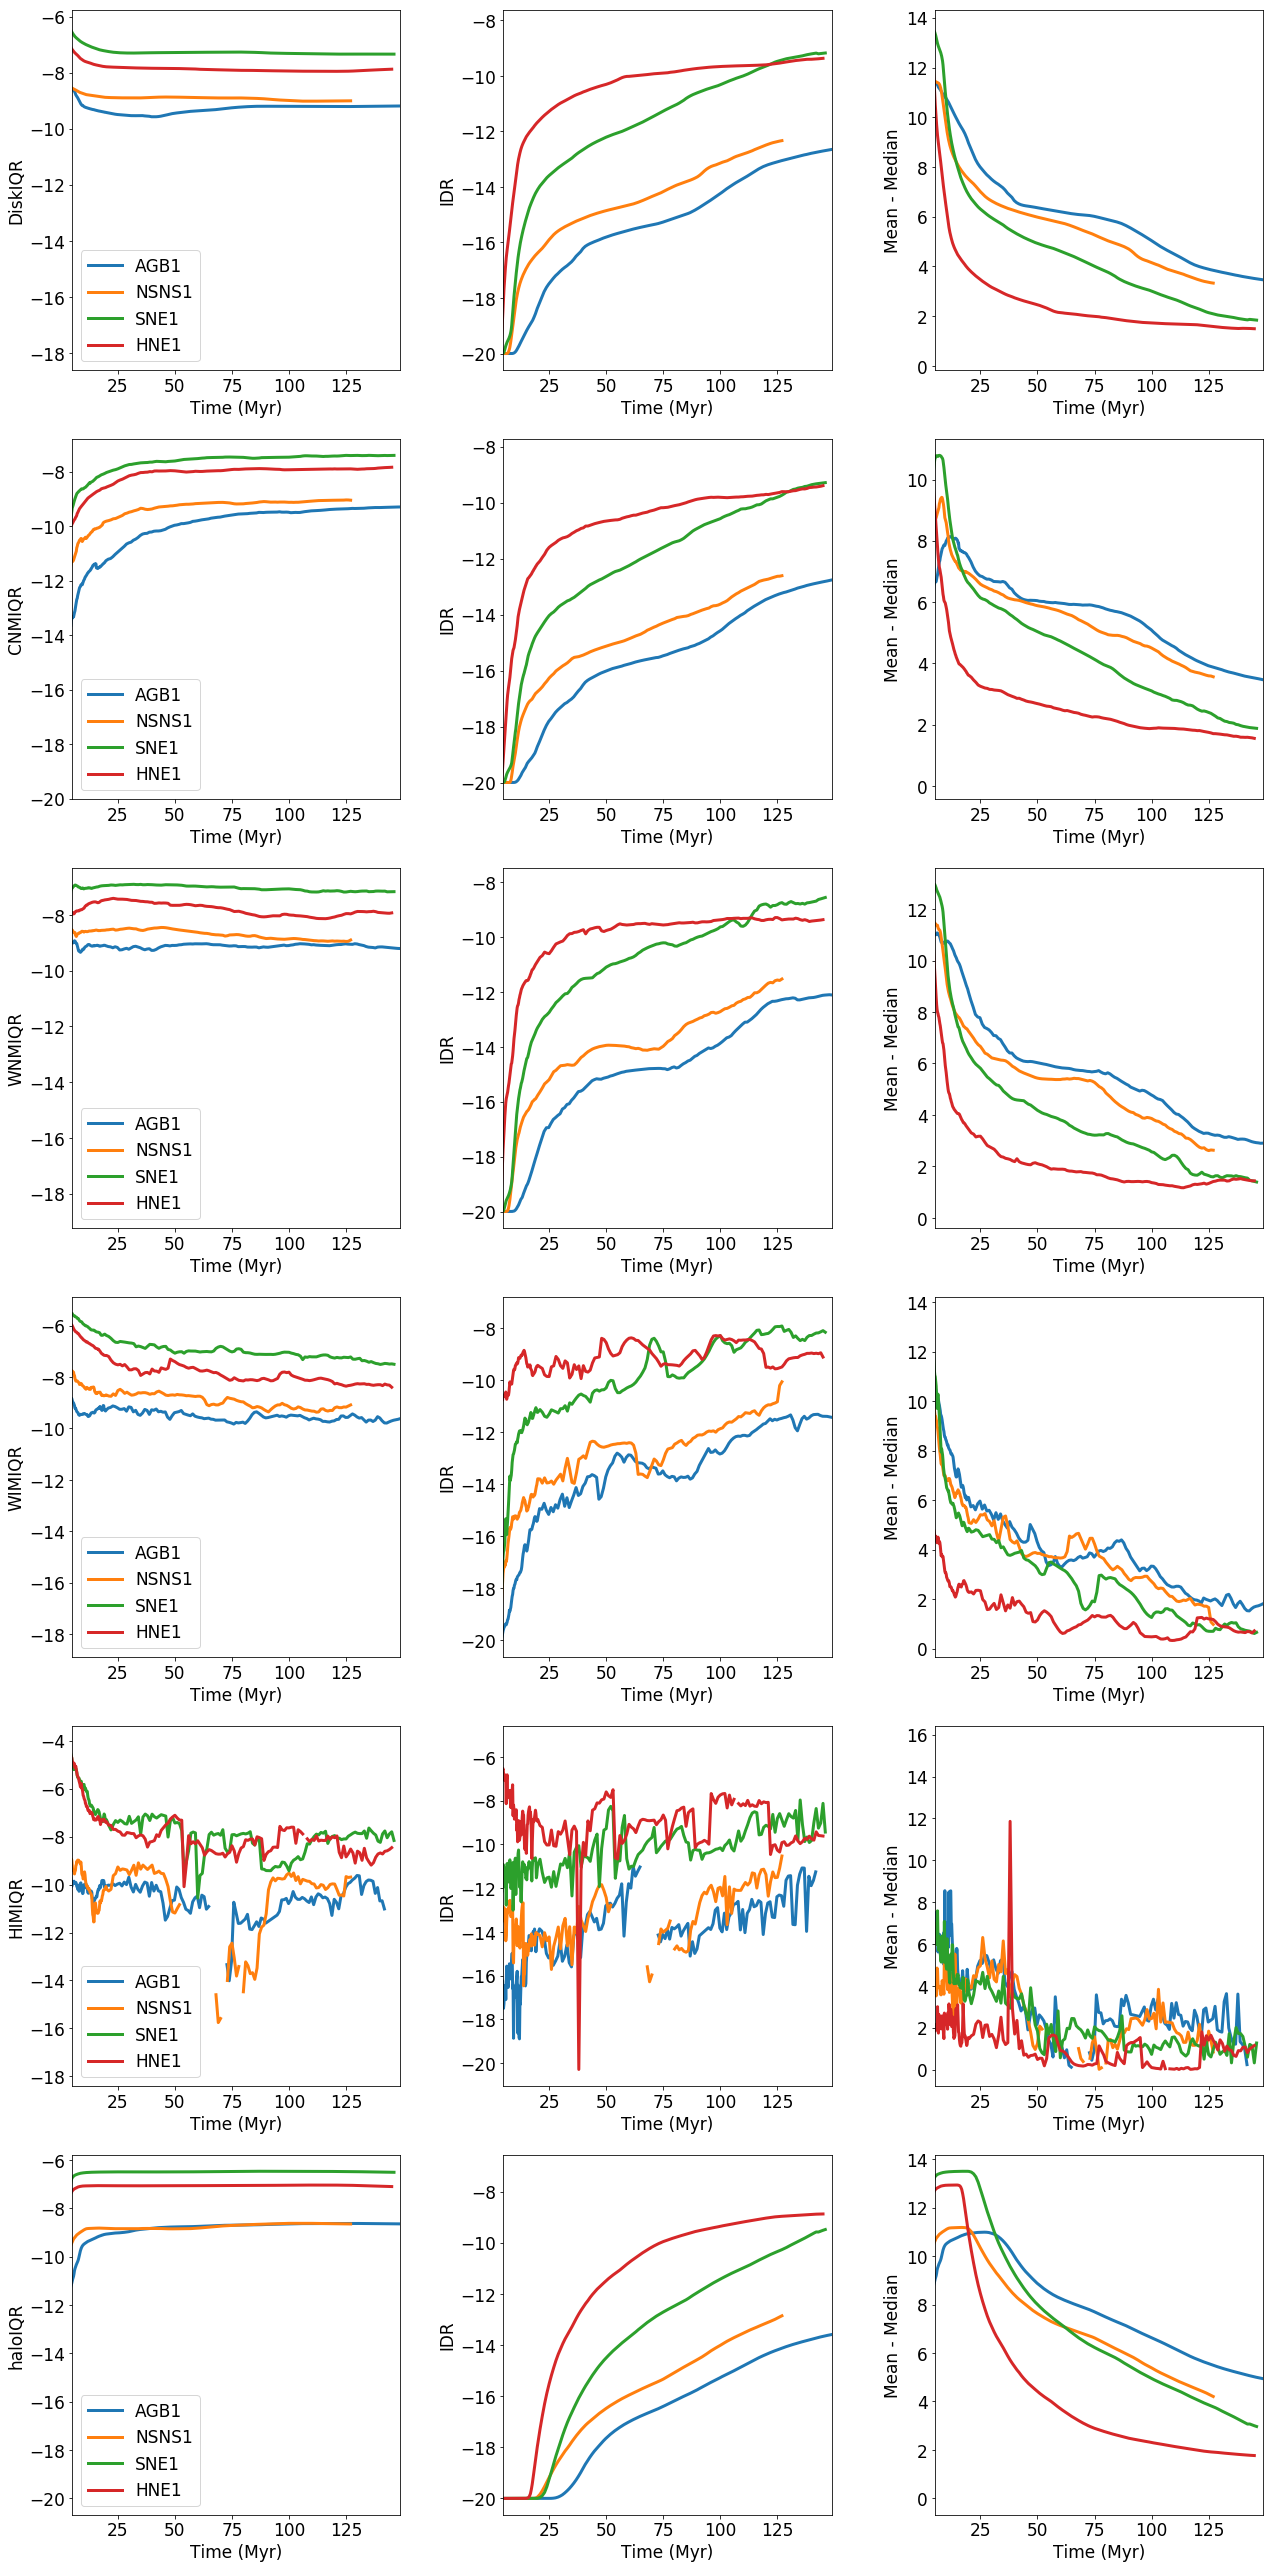

In [11]:
fig, all_ax = plt.subplots(6,3)
fig.set_size_inches(18,36)
phases = ['Disk','CNM','WNM','WIM','HIM','halo']

#
# Note mean reflects ejection fraction and initial mixing mass
#


colors = {'AGB1':'C0','NSNS1':'C1','SNE1':'C2','HNE1':'C3'}

minx = 1000
maxx = -1


for ax,phase in zip(all_ax,phases):
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean', 'average')
        ax[0].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
        minx = np.min( [minx,np.min(x)])
        maxx = np.max( [maxx,np.max(x)])
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'median', 'average')
        ax[1].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)
    
    for run in run_names:
        x,y = _get_plot_values(phase, run, 'mean-median', 'average')
        ax[2].plot(x, y, color = colors[run], lw = 3, ls = '-', label = run)    
    
    for a in ax:
        a.set_xlabel(r'Time (Myr)')
        a.set_xlim(5,maxx)

    ax[0].set_ylabel(phase + 'IQR')
    ax[1].set_ylabel('IDR')
    ax[2].set_ylabel('Mean - Median')
    ax[0].legend(loc= 'best')        
        
plt.tight_layout()






Text(25,0.5,'Stat')

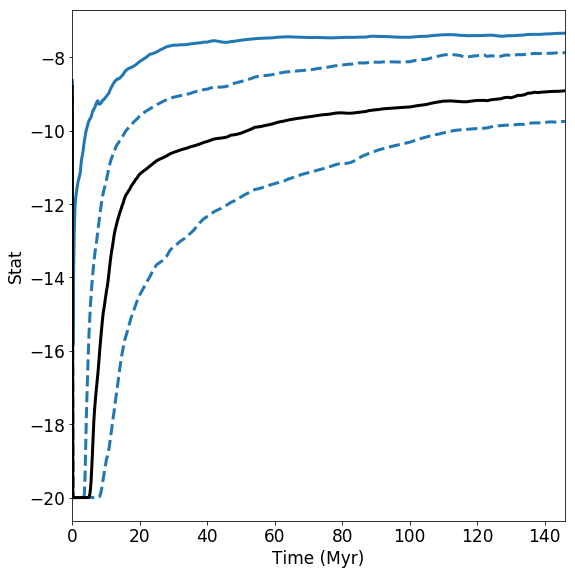

In [71]:
fig, ax = plt.subplots()
fig.set_size_inches(8,8)

ax.plot(mean['time'], Q3['Na'],  lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], Q1['Na'], lw = 3, color = 'C0', ls = '--', label = 'SNE IQR')
ax.plot(mean['time'], mean['Na'], lw = 3, color = 'C0', ls = '-', label = 'SNE IQR')
ax.plot(mean['time'], median['Na'], lw = 3, color = 'black', ls = '-', label = 'SNE IQR')



#ax.plot(mean_2['time'], Q3_2['average'],  lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], Q1_2['average'], lw = 3, color = 'C2', ls = '--', label = 'HNE IQR')
#ax.plot(mean_2['time'], mean_2['average'], lw = 3, color = 'C2', ls = '-', label = 'HNE IQR')


ax.set_xlim(mean['time'][0], mean['time'][-1])

plt.tight_layout()

ax.set_xlabel(r'Time (Myr)')
ax.set_ylabel(r'Stat')
